In [1]:
import numpy as np
from matplotlib import pyplot as plt

from data_generation import Three_body_2D_Rick
from data_generation import tbp_util
from data_generation.tbp_energy_calculations import visualize_dataset
from tensorflow import keras
import os

keras.backend.set_floatx('float64')
keras.backend.floatx()

2023-07-02 03:02:30.509725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'float64'

# Experiment 2

Same as experiment 1 but with 1 change:
- predict delta's

sweep learning rates?
Up layers and neurons?
Go back to original question:
- can the network predict t=10 just as well as t0.1=100 just as well ass t10e-5=10e6



In [2]:
experiments = {

    "Experiment_0": {
        "max_datasets": 63,
        "prediction_offset": 10,  # predict t time steps ahead
        "batch_size": 64,
        "epochs": 3,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 128,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 1,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_2": {
        "max_datasets": 102,
        "prediction_offset": 10,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 80,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 128,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 1,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_2_1": {
        "max_datasets": 102,
        "prediction_offset": 10,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 80,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 128,
        "learning_rate": 0.00001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 2,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_2_2": {
        "max_datasets": 102,
        "prediction_offset": 100,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 80,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 128,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 3,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_2_3": {
        "max_datasets": 102,
        "prediction_offset": 100,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 80,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 128,
        "learning_rate": 0.00001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 4,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_2_4": {
        "max_datasets": 102,
        "prediction_offset": 100,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 80,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 256,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 5,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_2_5": {
        "max_datasets": 102,
        "prediction_offset": 100,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 80,
        "validation_split": 0.1,
        "no_dense_layers": 16,
        "neurons_per_layer": 128,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 6,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_2_6": {
        "max_datasets": 102,
        "prediction_offset": 100,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 80,
        "validation_split": 0.1,
        "no_dense_layers": 16,
        "neurons_per_layer": 128,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "breen-et-al-00001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 10,
            "dataset_index": 7,
            "delta_scaling_factor": 10000
        }
    },
    "Experiment_2_7": {
        "max_datasets": 102,
        "prediction_offset": 1000,  # predict t time steps ahead
        "batch_size": 256,
        "epochs": 80,
        "validation_split": 0.1,
        "no_dense_layers": 10,
        "neurons_per_layer": 256,
        "learning_rate": 0.0001,
        "dataset": {
            "name": "verlet-000001",
            # filter 1 in 10 values to reduce RAM usage
            "downsample_factor": 50,
            "dataset_index": 8,
            "delta_scaling_factor": 100000
        }
    }
}


In [3]:
# todo read from config file
# also see tbp_util.py
G = 1.0
M = np.array([1.0, 1.0, 1.0])

starting Experiment_0

Setting breen-et-al-00001 as the configuration to load trajectories from
loaded 0 datasets
64 3 0.1 0.0001


2023-07-02 03:02:56.050940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 2/3
22148/22148 [==============================] - 77s 3ms/step - loss: 1.2461 - mae: 1.2461 - mse: 1452.6024 - val_loss: 1.2215 - val_mae: 1.2215 - val_mse: 1198.9365
Epoch 3/3
22148/22148 [==============================] - 83s 4ms/step - loss: 0.9872 - mae: 0.9872 - mse: 962.8168 - val_loss: 1.2247 - val_mae: 1.2247 - val_mse: 783.6912
INFO:tensorflow:Assets written to: ./models/Experiment_0/breen-et-al-00001/Experiment_0-breen-et-al-00001_model/assets


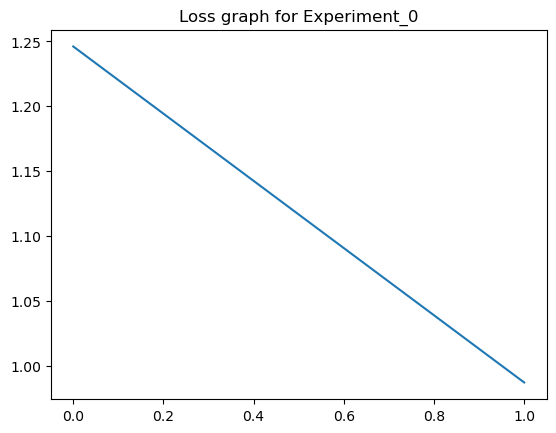

The original trajectory is T=250000 time steps long, so we have to predict T/prediction_offset=250000/10=25000 steps because we predict 10 steps into the future.
Stop predicting at t=143160 (14316 steps) after encountering [[  0.71634888  -1.49385965  -0.11414516  -0.5206245    0.22994875
    0.08949196  20.27996957  -1.86193207 -17.74808437  10.40636712
    7.08326637 -14.93343088]]


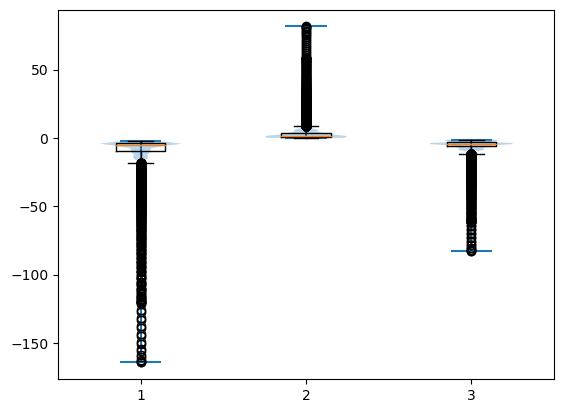

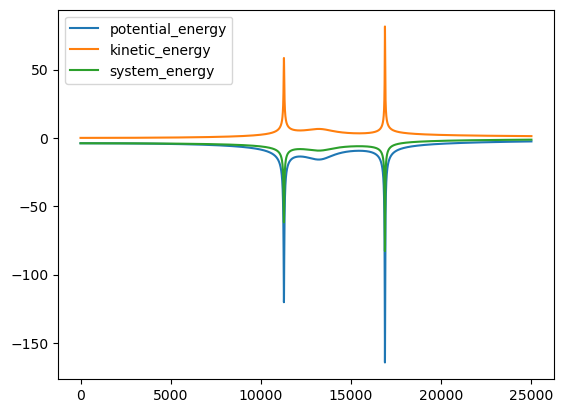

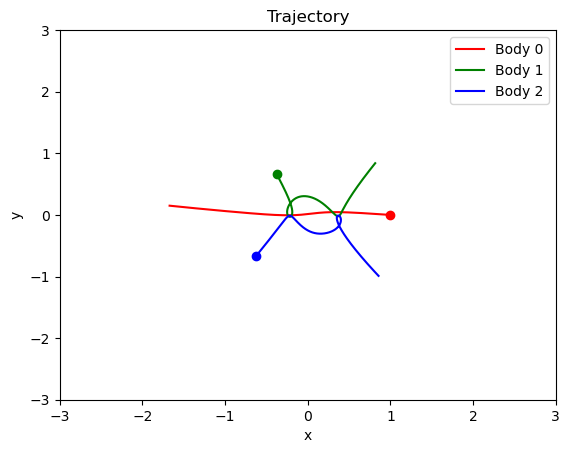

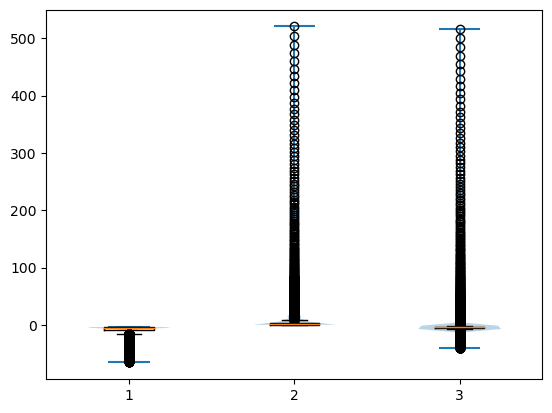

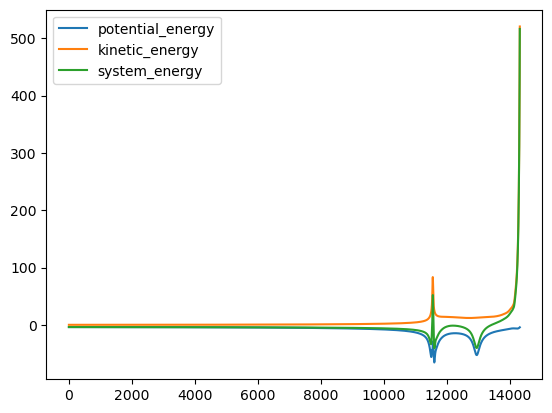

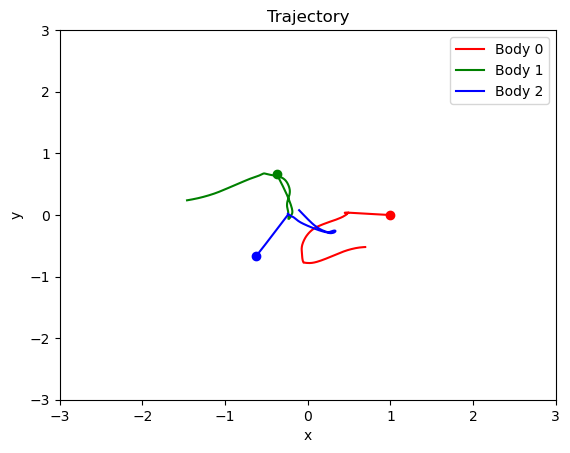

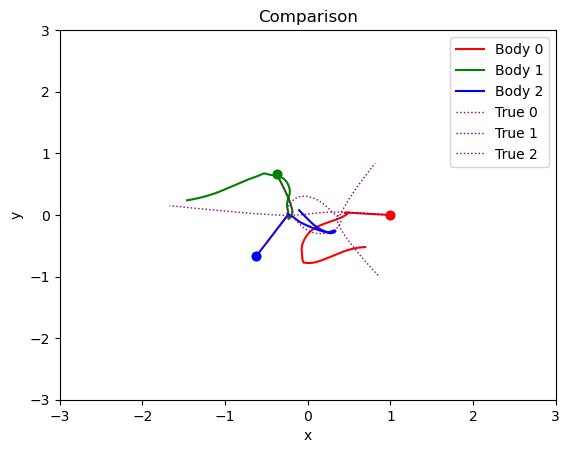

starting Experiment_2

Setting breen-et-al-00001 as the configuration to load trajectories from
loaded 0 datasets
256 80 0.1 0.0001
Epoch 1/80
8877/8877 [==============================] - 59s 7ms/step - loss: 2.6280 - mae: 2.6280 - mse: 16125.6380 - val_loss: 1.7940 - val_mae: 1.7940 - val_mse: 2871.5831
Epoch 2/80
8877/8877 [==============================] - 57s 6ms/step - loss: 1.7402 - mae: 1.7402 - mse: 13585.5896 - val_loss: 1.2163 - val_mae: 1.2163 - val_mse: 1527.8380
Epoch 3/80
8877/8877 [==============================] - 55s 6ms/step - loss: 1.3949 - mae: 1.3949 - mse: 12111.3152 - val_loss: 0.9483 - val_mae: 0.9483 - val_mse: 570.0535
Epoch 4/80
8877/8877 [==============================] - 55s 6ms/step - loss: 1.1818 - mae: 1.1818 - mse: 11036.1957 - val_loss: 0.8521 - val_mae: 0.8521 - val_mse: 346.1981
Epoch 5/80
8877/8877 [==============================] - 55s 6ms/step - loss: 1.0489 - mae: 1.0489 - mse: 10292.5370 - val_loss: 0.8059 - val_mae: 0.8059 - val_mse: 210.3736
E

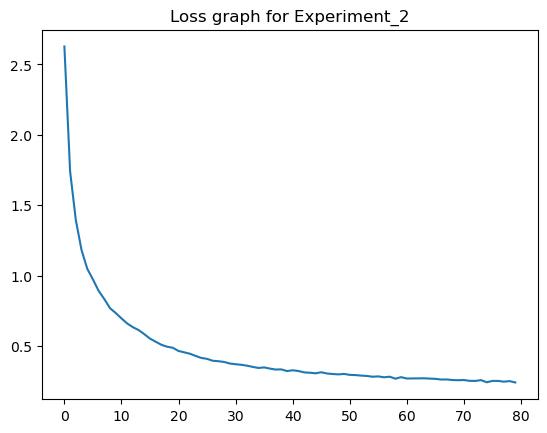

The original trajectory is T=250000 time steps long, so we have to predict T/prediction_offset=250000/10=25000 steps because we predict 10 steps into the future.


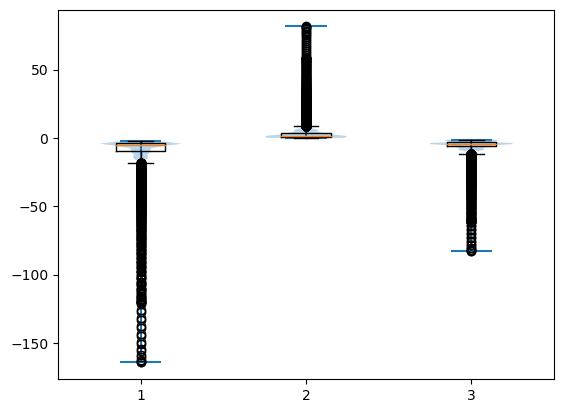

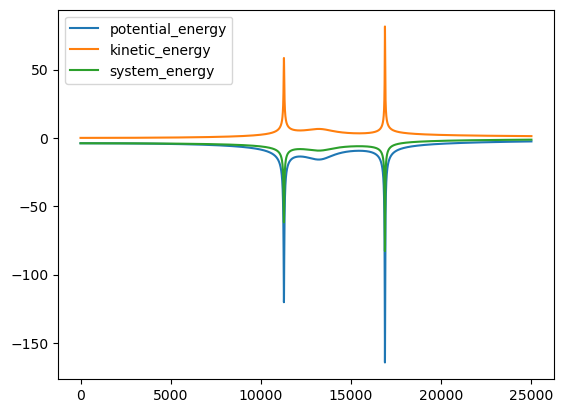

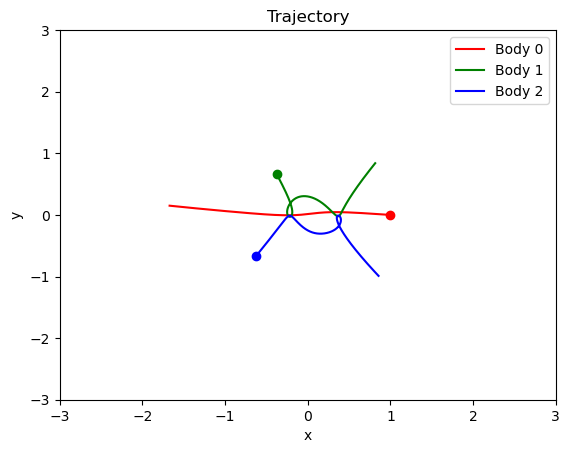

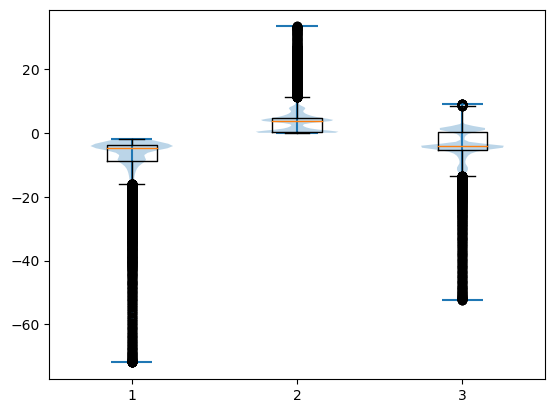

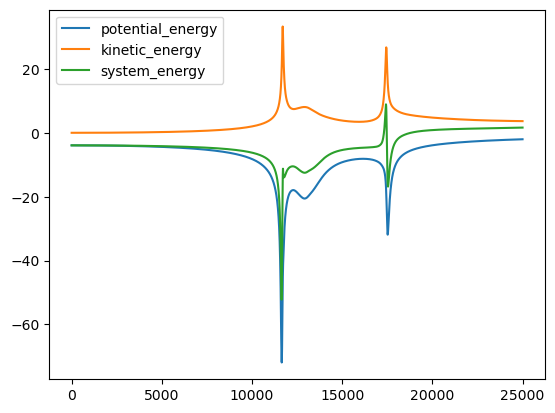

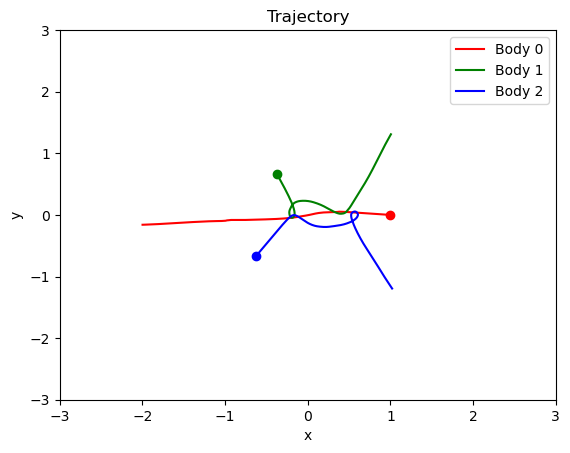

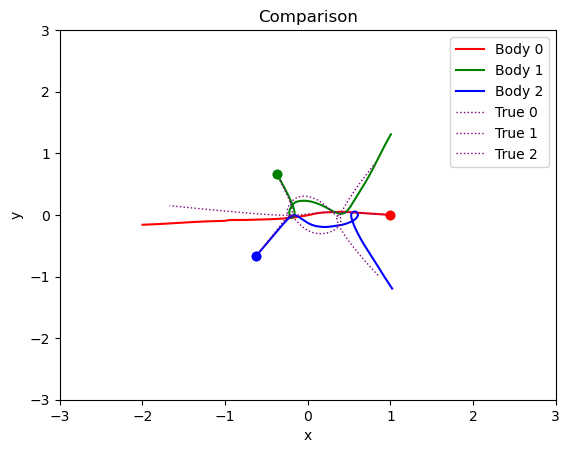

starting Experiment_2_1

Setting breen-et-al-00001 as the configuration to load trajectories from
loaded 0 datasets
256 80 0.1 1e-05
Epoch 1/80
8877/8877 [==============================] - 56s 6ms/step - loss: 3.8152 - mae: 3.8152 - mse: 18859.6262 - val_loss: 3.2859 - val_mae: 3.2859 - val_mse: 4533.9927
Epoch 2/80
8877/8877 [==============================] - 56s 6ms/step - loss: 3.3222 - mae: 3.3222 - mse: 18781.7093 - val_loss: 2.9719 - val_mae: 2.9719 - val_mse: 4420.2418
Epoch 3/80
8877/8877 [==============================] - 54s 6ms/step - loss: 3.0275 - mae: 3.0275 - mse: 18636.8072 - val_loss: 2.6964 - val_mae: 2.6964 - val_mse: 4263.3688
Epoch 4/80
8877/8877 [==============================] - 54s 6ms/step - loss: 2.8031 - mae: 2.8031 - mse: 18468.7349 - val_loss: 2.4853 - val_mae: 2.4853 - val_mse: 4090.0515
Epoch 5/80
8877/8877 [==============================] - 54s 6ms/step - loss: 2.6289 - mae: 2.6289 - mse: 18279.6757 - val_loss: 2.3184 - val_mae: 2.3184 - val_mse: 3926.70

In [ ]:
for experiment_id in experiments.keys():
    print(f'starting {experiment_id}\n')

    config_name = experiments[experiment_id]["dataset"]["name"]
    tbp_util.use_config(config_name)


    def get_deltas(x, y, vx, vy, delta=1, scaling_factor=1):
        dx = (x[:-delta] - x[delta:]) * scaling_factor
        dy = (y[:-delta] - y[delta:]) * scaling_factor
        dvx = (vx[:-delta] - vx[delta:]) * scaling_factor
        dvy = (vy[:-delta] - vy[delta:]) * scaling_factor
        return dx, dy, dvx, dvy


    max_datasets = experiments[experiment_id]['max_datasets']
    prediction_offset = experiments[experiment_id]['prediction_offset']
    downsample_factor = experiments[experiment_id]['dataset']['downsample_factor']
    dataset_index = experiments[experiment_id]['dataset']['dataset_index']
    scaling_factor = experiments[experiment_id]['dataset']['delta_scaling_factor']

    x_train = np.ndarray((0, 12), dtype=np.float64)
    y_train = np.ndarray((0, 12), dtype=np.float64)
    for dataset, x, y, vx, vy in tbp_util.load_datasets(limit=max_datasets):
        x = x[dataset_index:, :]
        y = y[dataset_index:, :]
        vx = vx[dataset_index:, :]
        vy = vy[dataset_index:, :]

        input_data = np.column_stack((x, y, vx, vy))
        input_data = input_data[:-prediction_offset:downsample_factor, :]

        deltas = get_deltas(x, y, vx, vy, delta=prediction_offset, scaling_factor=scaling_factor)
        output_data = np.column_stack(deltas)[::downsample_factor, :]

        x_train = np.concatenate((x_train, input_data))
        y_train = np.concatenate((y_train, output_data))
    assert x_train.shape == y_train.shape

    batch_size = experiments[experiment_id]['batch_size']
    epochs = experiments[experiment_id]['epochs']
    validation_split = experiments[experiment_id]['validation_split']
    learning_rate = experiments[experiment_id]['learning_rate']
    steps_per_epoch = round((x_train.shape[0] * (1 - validation_split)) / batch_size)

    print(f"{batch_size} {epochs} {validation_split} {learning_rate}")


    def create_model() -> keras.models.Sequential:
        neurons = experiments[experiment_id]['neurons_per_layer']
        no_dense_layers = experiments[experiment_id]['no_dense_layers']
        # start with input layer
        layers = [keras.layers.Dense(neurons, activation=keras.activations.relu, input_shape=[12])]
        # add dense layers
        layers.extend(
            [keras.layers.Dense(neurons, activation=keras.activations.relu) for _ in range(no_dense_layers - 1)])
        # add output layer
        layers.append(keras.layers.Dense(12, activation=keras.activations.linear)
                      )

        return keras.Sequential(layers)


    model = create_model()
    model.compile(
        keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mae',
        metrics=['mae', 'mse']
    )

    hist_callback = keras.callbacks.History()
    callbacks = [
        hist_callback,
        keras.callbacks.BackupAndRestore(backup_dir=f"model_backup/{experiment_id}")
    ]

    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=validation_split,
        callbacks=callbacks
    )

    # save model for later
    model_id = f'{experiment_id}-{config_name}'
    model_path = f'./models/{experiment_id}/{config_name}'
    os.makedirs(model_path, exist_ok=True)

    model.save(f"{model_path}/{model_id}_model")

    for x in ["h5"]:
        model.save(f"{model_path}/{model_id}_model.{x}", save_format=x)

    for x in ["h5", "tf"]:
        model.save_weights(f"{model_path}/{model_id}_weights.{x}", save_format=x)

    os.makedirs(f'{model_path}/{model_id}', exist_ok=True)
    plt.figure()
    plt.title(f"Loss graph for {experiment_id}")
    plt.plot(hist_callback.history['loss'], label="loss")
    plt.savefig(f'{model_path}/{model_id}/loss.svg', format='svg', dpi=1200)
    plt.show()

    import json

    with open(f'{model_path}/{model_id}/loss.json', 'w') as f:
        f.write(json.dumps(hist_callback.history))

    # validation
    dataset_to_predict = '18'
    x, y, vx, vy = tbp_util.load_dataset(dataset_to_predict)

    length_to_predict = int(x.shape[0] / prediction_offset)
    print(
        f"The original trajectory is T={x.shape[0]} time steps long, so we have to predict T/prediction_offset={x.shape[0]}/{prediction_offset}={length_to_predict} steps because we predict {prediction_offset} steps into the future.")

    limit = length_to_predict
    y_pred = np.zeros((limit, 12), dtype=np.float64)
    y_pred[0,] = np.concatenate((x[0,], y[0,], vx[0,], vy[0,]))

    for i in range(limit - 1):
        prediction = model(y_pred[i,].reshape(1, 12), training=False).numpy()

        # convert the delta's to an actual prediction
        prediction /= scaling_factor
        prediction = y_pred[i,].reshape(1, 12) - prediction

        # stop early when the system gets out of bounds
        if np.min(prediction[0, :6]) < -3 or np.max(prediction[0, :6]) > 3 or np.min(prediction) < -20 or np.max(
                prediction) > 20:
            print(f"Stop predicting at t={i * prediction_offset} ({i} steps) after encountering {prediction}")
            break

        y_pred[i + 1,] = prediction

    y_pred = y_pred[:i]

    # Real trajectory
    visualize_dataset(*tbp_util.load_dataset(dataset_to_predict), G, M, down_sample_factor=prediction_offset)

    # Predicted trajectory
    pred_x, pred_y, pred_vx, pred_vy = np.hsplit(y_pred, 4)
    visualize_dataset(pred_x, pred_y, pred_vx, pred_vy, G, M, down_sample_factor=1)

    # Comparison plot
    true_x, true_y, _, _ = tbp_util.load_dataset(dataset_to_predict)
    Three_body_2D_Rick.compare_plot(true_x, true_y, pred_x, pred_y, path=f'{model_path}/{model_id}', savefig=True)